# Стратегия Momentum
Momentum (импульсная) стратегия основана на принципе, что ценовые тренды имеют тенденцию сохраняться в течение определенного периода времени. В основе лежит предположение, что активы, которые показывали хорошую динамику в прошлом, вероятно, продолжат расти, а активы с плохой динамикой продолжат падать

# ROC индикатор (Rate of Change)

### ROC измеряет процентное изменение цены за определенный период:

* $ROC = ((Текущая цена / Цена n периодов назад) - 1) × 100$
Например, 14-дневный ROC сравнивает текущую цену с ценой 14 дней назад:

* Положительное значение ROC указывает на восходящий импульс
* Отрицательное значение ROC указывает на нисходящий импульс
* Чем выше абсолютное значение ROC, тем сильнее импульс

### В Momentum-стратегиях ROC используется для:
* Ранжирования активов по силе импульса
* Определения точек входа (когда ROC пересекает нулевую линию снизу вверх)
* Определения точек выхода (когда ROC пересекает нулевую линию сверху вниз)

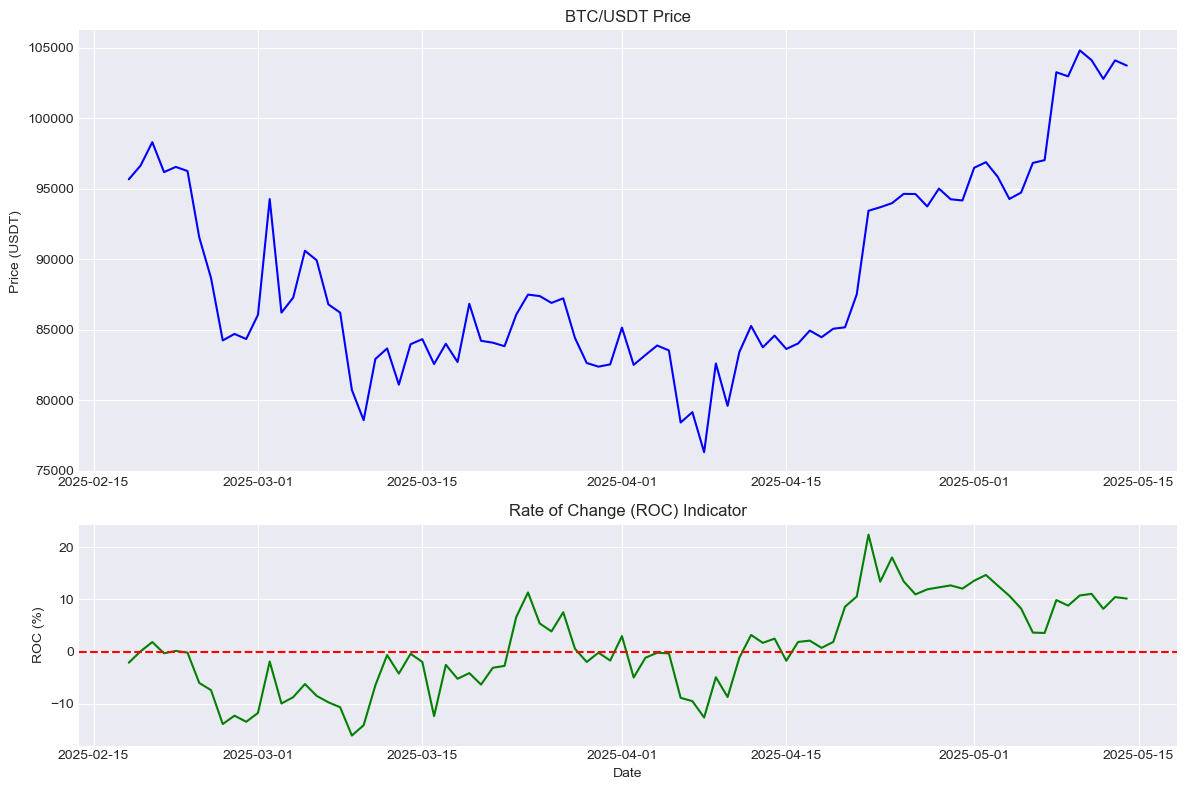

График ROC индикатора для BTC успешно построен


In [12]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Получение данных о цене BTC с Binance API
def get_binance_data(symbol='BTCUSDT', interval='1d', limit=100):
    base_url = 'https://api.binance.com/api/v3/klines'
    params = {
        'symbol': symbol,
        'interval': interval,
        'limit': limit
    }
    
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        df = pd.DataFrame(data, columns=[
            'open_time', 'open', 'high', 'low', 'close', 'volume',
            'close_time', 'quote_asset_volume', 'number_of_trades',
            'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'
        ])
        
        # Конвертация типов данных
        df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
        df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')
        
        numeric_columns = ['open', 'high', 'low', 'close', 'volume']
        df[numeric_columns] = df[numeric_columns].astype(float)
        
        return df
    else:
        print(f"Ошибка при получении данных: {response.status_code}")
        return None

# Расчет индикатора ROC (Rate of Change)
def calculate_roc(data, period=14):
    # ROC = [(Цена закрытия сегодня / Цена закрытия n периодов назад) - 1] * 100
    df = data.copy()
    df['roc'] = ((df['close'] / df['close'].shift(period)) - 1) * 100
    return df

# Построение графика
def plot_price_and_roc(data):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [2, 1]})
    
    # График цены BTC
    ax1.plot(data['open_time'], data['close'], color='blue')
    ax1.set_title('BTC/USDT Price')
    ax1.set_ylabel('Price (USDT)')
    ax1.grid(True)
    
    # График ROC индикатора
    ax2.plot(data['open_time'], data['roc'], color='green')
    ax2.axhline(y=0, color='red', linestyle='--')
    ax2.set_title('Rate of Change (ROC) Indicator')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('ROC (%)')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.savefig('btc_roc_indicator.png')
    plt.show()

# Основная функция
def main():
    # Получение данных за последние 100 дней
    data = get_binance_data(symbol='BTCUSDT', interval='1d', limit=100)
    
    if data is not None:
        # Расчет ROC с периодом 14 дней
        data_with_roc = calculate_roc(data, period=14)
        
        # Отбрасываем строки с NaN значениями (первые 14 дней)
        data_with_roc = data_with_roc.dropna()
        
        # Построение графика
        plot_price_and_roc(data_with_roc)
        
        print("График ROC индикатора для BTC успешно построен")
    else:
        print("Не удалось получить данные для построения графика")

if __name__ == "__main__":
    main()

# RSI (Relative Strength Index)
* RSI — осциллятор, который измеряет скорость и изменение ценовых движений, показывая относительную силу тренда:
$RSI = 100 - (100 / (1 + RS))$, где:

* RS = Средний прирост / Средний убыток

### В контексте Momentum-стратегий RSI используется следующим образом:

* RSI > 70 может указывать на перекупленность, но в случае сильного восходящего тренда также свидетельствует о значительном импульсе
* RSI < 30 может указывать на перепроданность
* Дивергенция между RSI и ценой может сигнализировать о потенциальном развороте импульса
* "Бычья" зона RSI (40-90) и "медвежья" зона RSI (10-60) могут использоваться для определения общего направления импульса

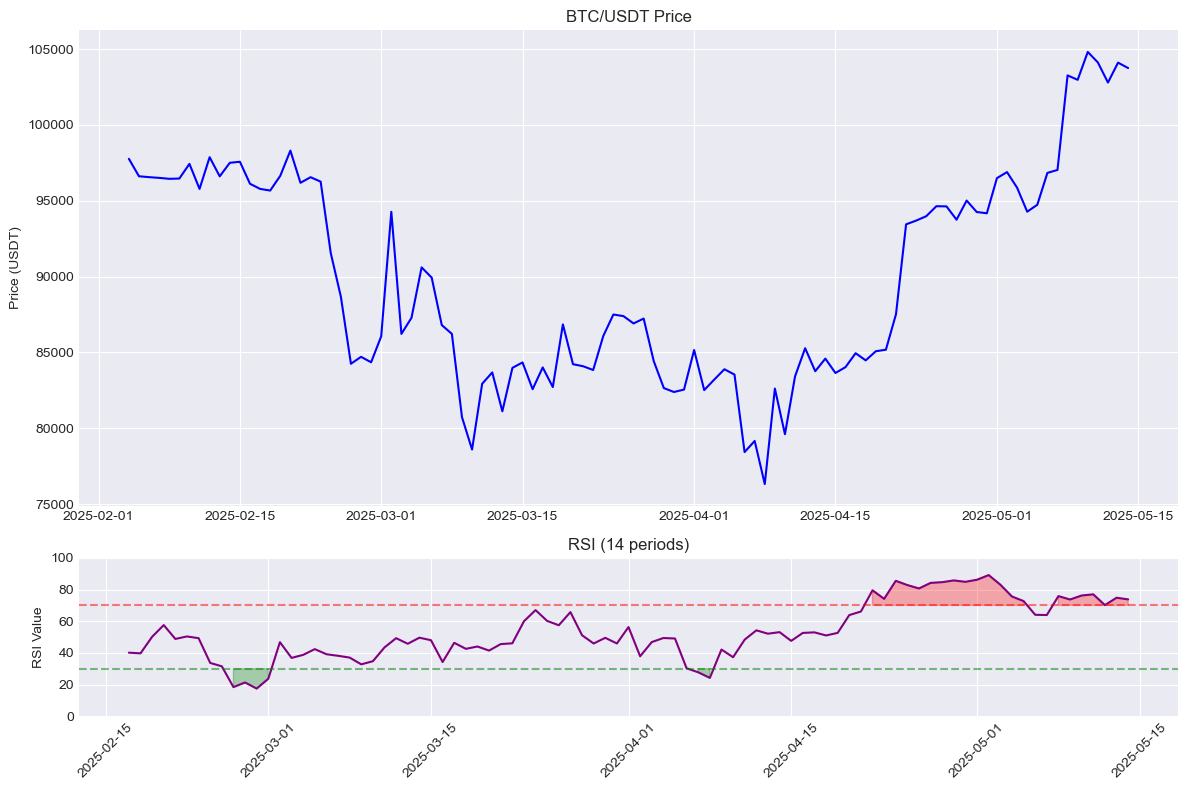

Recent BTC prices and RSI values:
    open_time      close        rsi
95 2025-05-10  104809.53  76.220040
96 2025-05-11  104118.00  76.961970
97 2025-05-12  102791.32  70.162928
98 2025-05-13  104103.72  74.801750
99 2025-05-14  103745.67  73.786166


In [14]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Fetch BTC data from Binance API
def get_binance_data(symbol='BTCUSDT', interval='1d', limit=100):
    base_url = 'https://api.binance.com/api/v3/klines'
    params = {
        'symbol': symbol,
        'interval': interval,
        'limit': limit
    }
    
    response = requests.get(base_url, params=params)
    data = response.json()
    
    # Convert to DataFrame
    df = pd.DataFrame(data, columns=[
        'open_time', 'open', 'high', 'low', 'close', 'volume',
        'close_time', 'quote_asset_volume', 'number_of_trades',
        'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'
    ])
    
    # Convert timestamp to datetime
    df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
    df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')
    
    # Convert string values to float
    for col in ['open', 'high', 'low', 'close', 'volume']:
        df[col] = df[col].astype(float)
    
    return df

# Main function to plot BTC with RSI
def plot_btc_rsi(interval='1d', limit=100, rsi_window=14):
    # Get BTC data
    df = get_binance_data(interval=interval, limit=limit)
    
    # Calculate RSI
    df['rsi'] = calculate_rsi(df['close'], window=rsi_window)
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})
    
    # Plot BTC price
    ax1.plot(df['open_time'], df['close'], color='blue')
    ax1.set_title('BTC/USDT Price')
    ax1.set_ylabel('Price (USDT)')
    ax1.grid(True)
    
    # Plot RSI
    ax2.plot(df['open_time'], df['rsi'], color='purple')
    ax2.axhline(y=70, color='red', linestyle='--', alpha=0.5)
    ax2.axhline(y=30, color='green', linestyle='--', alpha=0.5)
    ax2.fill_between(df['open_time'], df['rsi'], 70, where=(df['rsi'] >= 70), color='red', alpha=0.3)
    ax2.fill_between(df['open_time'], df['rsi'], 30, where=(df['rsi'] <= 30), color='green', alpha=0.3)
    ax2.set_title(f'RSI ({rsi_window} periods)')
    ax2.set_ylabel('RSI Value')
    ax2.set_ylim(0, 100)
    ax2.grid(True)
    
    # Format x-axis to show dates nicely
    plt.xticks(rotation=45)
    fig.tight_layout()
    
    # Show plot
    plt.show()

    # Save plot to file
    fig.savefig('btc_rsi_chart.png')
    
    # Print the last few values
    print("Recent BTC prices and RSI values:")
    print(df[['open_time', 'close', 'rsi']].tail())

# Example usage
if __name__ == "__main__":
    # You can change these parameters
    plot_btc_rsi(
        interval='1d',    # Options: 1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M
        limit=100,        # Number of candles (max 1000)
        rsi_window=14     # RSI period (default is 14)
    )

# MACD (Moving Average Convergence Divergence)

### MACD совмещает свойства осциллятора и следования за трендом, состоит из трех компонентов:
* MACD линия = EMA(12) - EMA(26)
* Сигнальная линия = EMA(9) от MACD линии
* Гистограмма = MACD линия - Сигнальная линия, где EMA — экспоненциальная скользящая средняя

### В Momentum-стратегиях MACD используется для:
* Определения силы импульса (высота гистограммы)
* Определения смены направления импульса (пересечение MACD и сигнальной линии)
* Подтверждения тренда (положение MACD относительно нулевой линии)
* Выявления дивергенций (расхождение между движением цены и MACD)

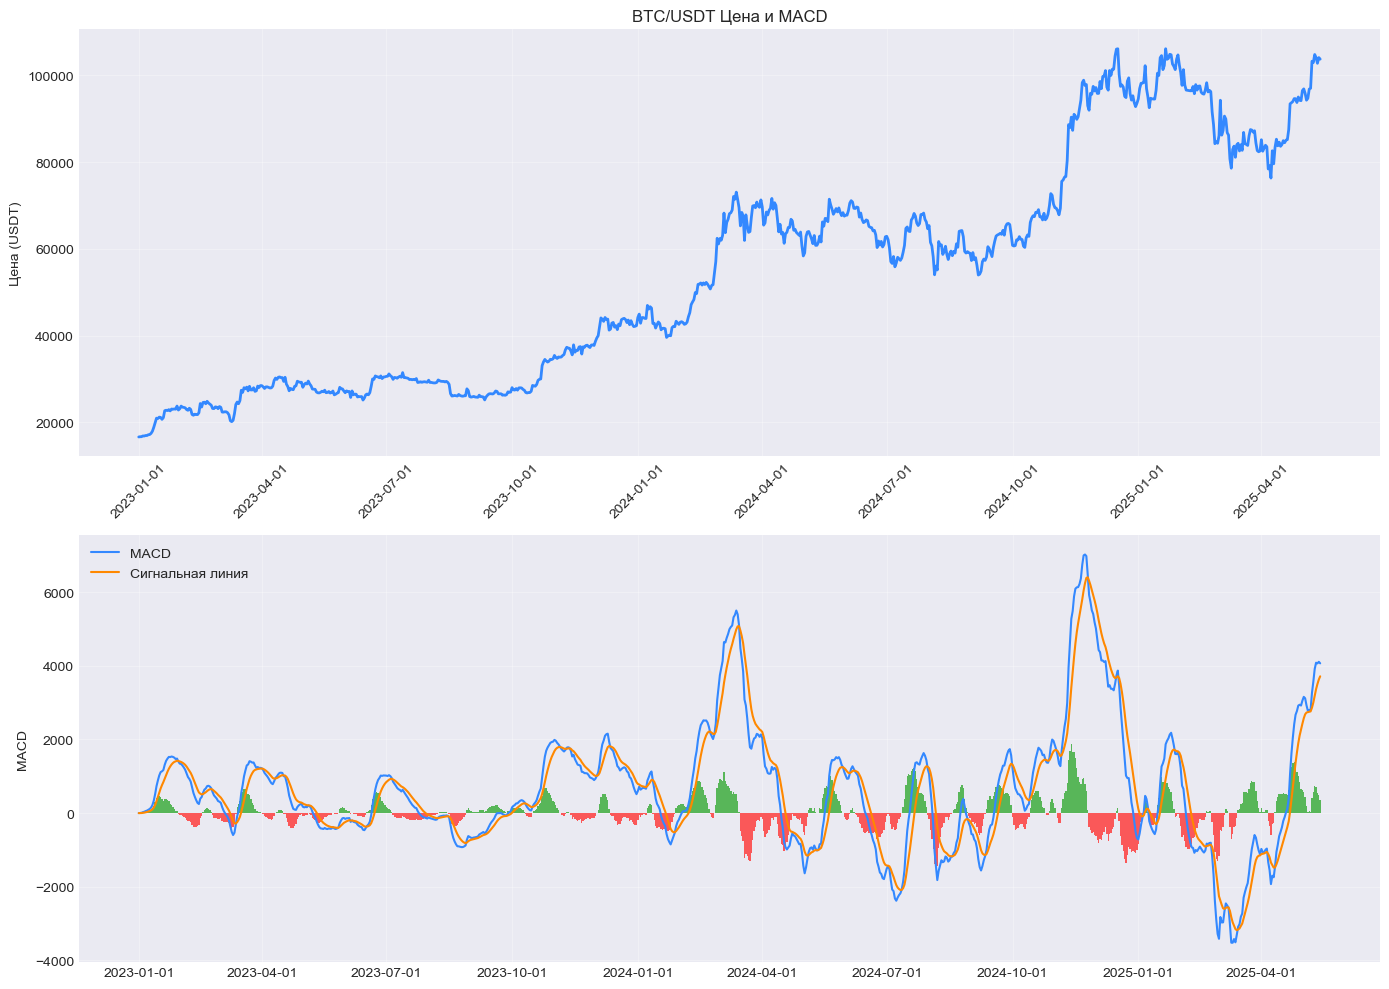

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from binance.client import Client
from datetime import datetime

# Инициализация клиента Binance (без ключей для публичного API)
client = Client("", "")

# Получение исторических данных для BTC/USDT
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1DAY, "1 Jan, 2023")

# Преобразование данных в DataFrame
df = pd.DataFrame(klines, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 
                                  'close_time', 'quote_asset_volume', 'number_of_trades', 
                                  'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])

# Преобразование типов данных
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df['close'] = df['close'].astype(float)

# Расчет MACD
# Обычно используются EMA(12), EMA(26) и сигнальная линия EMA(9)
exp1 = df['close'].ewm(span=12, adjust=False).mean()
exp2 = df['close'].ewm(span=26, adjust=False).mean()
macd = exp1 - exp2
signal = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal

# Построение графика
plt.figure(figsize=(14, 10))

# График цены BTC
ax1 = plt.subplot(211)
ax1.plot(df['timestamp'], df['close'], color='#3388ff', linewidth=2)
ax1.set_title('BTC/USDT Цена и MACD')
ax1.set_ylabel('Цена (USDT)')
ax1.grid(True, alpha=0.3)

# Форматирование даты на оси X
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# График MACD
ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(df['timestamp'], macd, color='#3388ff', linewidth=1.5, label='MACD')
ax2.plot(df['timestamp'], signal, color='#ff8800', linewidth=1.5, label='Сигнальная линия')

# Добавление гистограммы
for i, (hist, date) in enumerate(zip(histogram, df['timestamp'])):
    if hist >= 0:
        ax2.bar(date, hist, color='#33aa33', width=1.0, alpha=0.8)
    else:
        ax2.bar(date, hist, color='#ff3333', width=1.0, alpha=0.8)

ax2.set_ylabel('MACD')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left')

# Форматирование и отображение
plt.tight_layout()
plt.savefig('btc_macd.png', dpi=300)
plt.show()

# Статистическая значимость ускорения цены
Для оценки статистической значимости ускорения цены используются T-тест

### T-тест для оценки ускорения:
* t = (Среднее ускорение цены / Стандартное отклонение ускорения) × √n*, где n — количество наблюдений

### P-значение < 0.05 указывает на статистически значимое ускорение

### Z-score для нормализации ускорения:
$Z = (Текущее ускорение - Среднее значение ускорения) / Стандартное отклонение ускорения$

* Z-score > 2 указывает на аномально высокое ускорение с 95% уверенностью


### Метод наименьших квадратов для оценки коэффициента ускорения в уравнении:
* $Цена = α + β₁×Время + β₂×Время² + ε$, где β₂ представляет ускорение, а ε — случайную ошибку

# Вычисление силы тренда через ADX (Average Directional Index)
ADX измеряет силу тренда независимо от его направления и рассчитывается следующим образом:

### Вычисление показателей направленного движения:
* +DM = Текущий High - Предыдущий High (если > 0, иначе 0)
* -DM = Предыдущий Low - Текущий Low (если > 0, иначе 0)

### Сглаживание значений +DM и -DM за период n (обычно 14):
* +DI = (Сглаженное +DM / ATR) × 100
* -DI = (Сглаженное -DM / ATR) × 100, где ATR — Average True Range

### Расчет индекса направленного движения (DX):
* DX = (|+DI - (-DI)|) / (+DI + (-DI)) × 100

### Сглаживание DX для получения ADX:
* ADX = Среднее значение DX за период n


### Интерпретация ADX в Momentum-стратегиях:

* ADX < 20: слабый тренд или его отсутствие
* ADX 20-30: формирующийся тренд
* ADX 30-50: сильный тренд
* ADX > 50: очень сильный тренд

### В Momentum-стратегиях ADX используется для:

* Фильтрации сигналов (игнорирование сигналов при ADX < 20)
* Определения оптимального размера позиции (больший размер при высоком ADX)
* Подтверждения силы импульса
* Определения потенциала для продолжения тренда

Fetching BTC/USDT data from Binance...
Calculating ADX indicator for 500 periods...

Data Sample:
                close    plus_di   minus_di        adx
timestamp                                             
2025-05-10  104809.53  35.111681  13.362334  52.529520
2025-05-11  104118.00  35.250312  12.656149  50.251283
2025-05-12  102791.32  33.121025  16.743316  47.652396
2025-05-13  104103.72  31.585705  15.967182  45.163446
2025-05-14  103720.62  33.008518  14.479635  43.404390


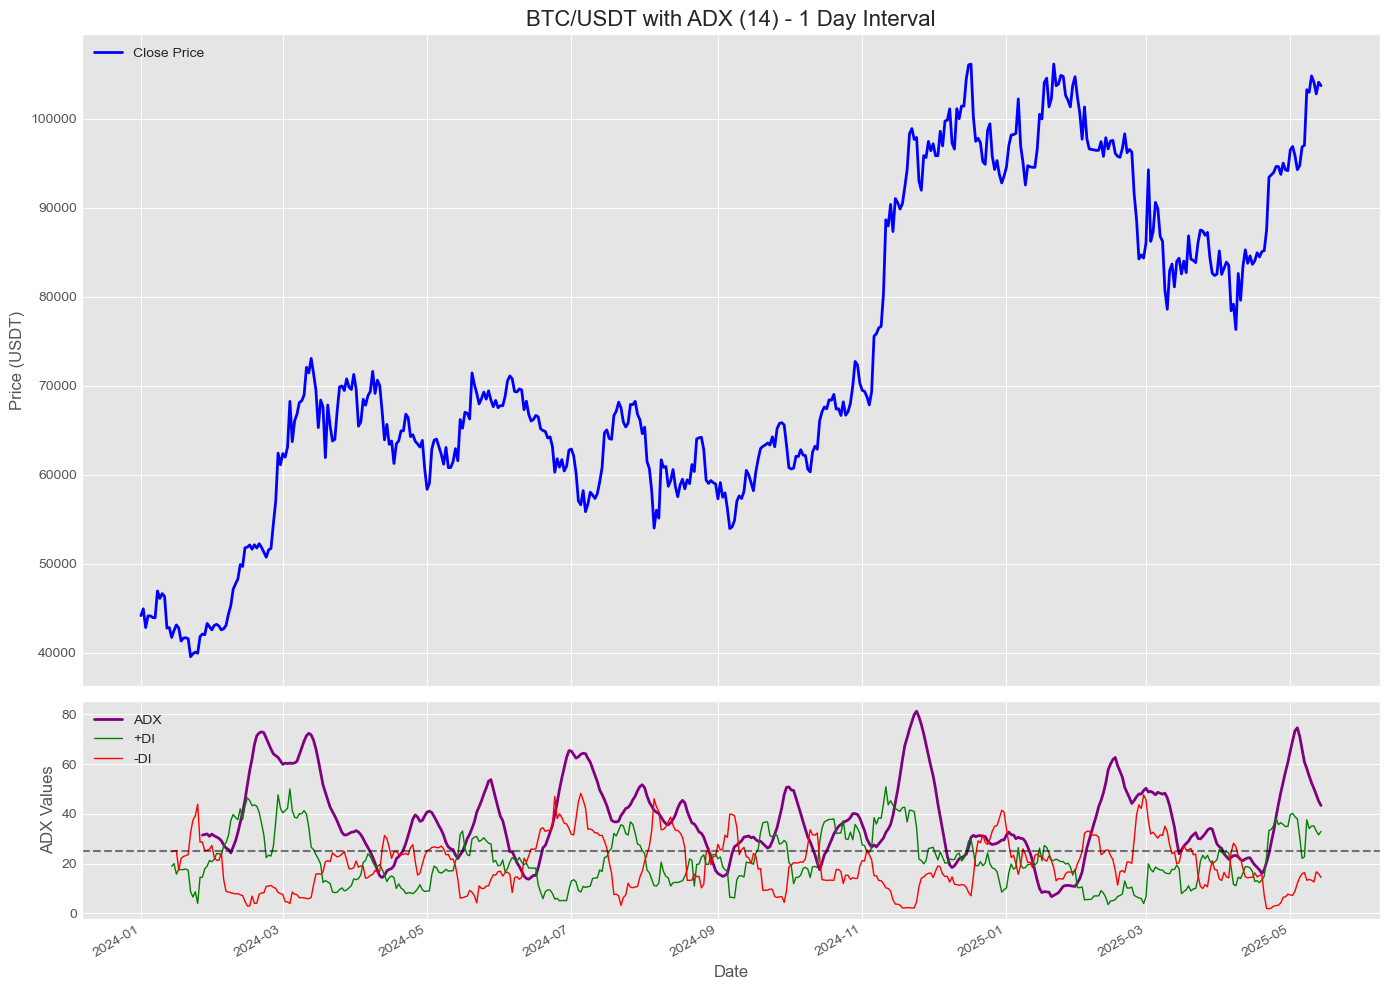


Chart has been generated and saved as 'btc_adx_chart.png'


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests
from datetime import datetime, timedelta
import time

# Set plot style
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 10)

def get_binance_data(symbol, interval, limit=500):
    """
    Fetch historical data from Binance API
    
    Parameters:
    symbol (str): Trading pair (e.g., 'BTCUSDT')
    interval (str): Kline interval (e.g., '1d', '4h', '1h', etc.)
    limit (int): Number of candles to fetch (max 1000)
    
    Returns:
    DataFrame with OHLCV data
    """
    base_url = 'https://api.binance.com/api/v3/klines'
    params = {
        'symbol': symbol,
        'interval': interval,
        'limit': limit
    }
    
    response = requests.get(base_url, params=params)
    data = response.json()
    
    # Create DataFrame
    df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 
                                     'close_time', 'quote_asset_volume', 'number_of_trades',
                                     'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
    
    # Convert timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    # Convert values to float
    for col in ['open', 'high', 'low', 'close', 'volume']:
        df[col] = df[col].astype(float)
    
    # Set timestamp as index
    df.set_index('timestamp', inplace=True)
    
    return df

def calculate_adx(df, period=14):
    """
    Calculate the Average Directional Index (ADX)
    
    Parameters:
    df (DataFrame): DataFrame with OHLCV data
    period (int): Period for ADX calculation
    
    Returns:
    DataFrame with ADX values and directional indicators
    """
    # True Range
    df['tr0'] = abs(df['high'] - df['low'])
    df['tr1'] = abs(df['high'] - df['close'].shift(1))
    df['tr2'] = abs(df['low'] - df['close'].shift(1))
    df['tr'] = df[['tr0', 'tr1', 'tr2']].max(axis=1)
    
    # Directional Movement
    df['up_move'] = df['high'] - df['high'].shift(1)
    df['down_move'] = df['low'].shift(1) - df['low']
    
    # Positive and Negative Directional Movement
    df['plus_dm'] = np.where((df['up_move'] > df['down_move']) & (df['up_move'] > 0), df['up_move'], 0)
    df['minus_dm'] = np.where((df['down_move'] > df['up_move']) & (df['down_move'] > 0), df['down_move'], 0)
    
    # Smooth the True Range and Directional Movement
    df['atr'] = df['tr'].rolling(window=period).mean()
    df['plus_di'] = 100 * (df['plus_dm'].rolling(window=period).mean() / df['atr'])
    df['minus_di'] = 100 * (df['minus_dm'].rolling(window=period).mean() / df['atr'])
    
    # Calculate Directional Index
    df['dx'] = 100 * (abs(df['plus_di'] - df['minus_di']) / (df['plus_di'] + df['minus_di']).replace(0, 0.000001))
    
    # Calculate Average Directional Index
    df['adx'] = df['dx'].rolling(window=period).mean()
    
    # Clean up intermediate columns
    df.drop(['tr0', 'tr1', 'tr2', 'up_move', 'down_move'], axis=1, inplace=True)
    
    return df

def plot_price_with_adx(df, title="BTC/USDT with ADX Indicator"):
    """
    Plot price chart with ADX indicator
    
    Parameters:
    df (DataFrame): DataFrame with price and ADX data
    title (str): Chart title
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
    
    # Plot price on top subplot
    ax1.plot(df.index, df['close'], label='Close Price', color='blue', linewidth=2)
    ax1.set_title(f'{title}', fontsize=16)
    ax1.set_ylabel('Price (USDT)', fontsize=12)
    ax1.legend(loc='upper left')
    ax1.grid(True)
    
    # Plot ADX on bottom subplot
    ax2.plot(df.index, df['adx'], label='ADX', color='purple', linewidth=2)
    ax2.plot(df.index, df['plus_di'], label='+DI', color='green', linewidth=1)
    ax2.plot(df.index, df['minus_di'], label='-DI', color='red', linewidth=1)
    
    # Add horizontal line at ADX = 25 (strong trend threshold)
    ax2.axhline(y=25, color='black', linestyle='--', alpha=0.5)
    
    ax2.set_ylabel('ADX Values', fontsize=12)
    ax2.set_xlabel('Date', fontsize=12)
    ax2.legend(loc='upper left')
    ax2.grid(True)
    
    # Format x-axis date
    plt.gcf().autofmt_xdate()
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the chart to a file
    plt.savefig('btc_adx_chart.png', dpi=300, bbox_inches='tight')
    
    # Display the chart
    plt.show()

def main():
    """
    Main function to fetch data, calculate ADX, and plot chart
    """
    print("Fetching BTC/USDT data from Binance...")
    
    # Get BTC/USDT data from Binance - adjust interval as needed
    interval = '1d'  # Options: 1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M
    df = get_binance_data('BTCUSDT', interval, limit=500)
    
    print(f"Calculating ADX indicator for {len(df)} periods...")
    
    # Calculate ADX
    adx_period = 14
    df = calculate_adx(df, period=adx_period)
    
    # Display data sample
    print("\nData Sample:")
    print(df[['close', 'plus_di', 'minus_di', 'adx']].tail())
    
    # Plot chart
    interval_text = '1 Day' if interval == '1d' else interval
    plot_price_with_adx(df, title=f"BTC/USDT with ADX ({adx_period}) - {interval_text} Interval")
    
    print("\nChart has been generated and saved as 'btc_adx_chart.png'")

if __name__ == "__main__":
    main()

# Перейдем к стратегии

Загрузка данных для BTCUSDT с 01.01.2025 по 10.05.2025...
Загружено 3097 свечей
Запуск бэктестирования...

Результаты бэктестирования:
Начальный капитал: $10,000.00
Конечный капитал: $10,139.35
Прирост капитала: 1.39%
Максимальная просадка: 11.79%
Количество сделок: 94
Winrate: 57.45%
Средний профит: 0.77%
Средний убыток: 0.78%


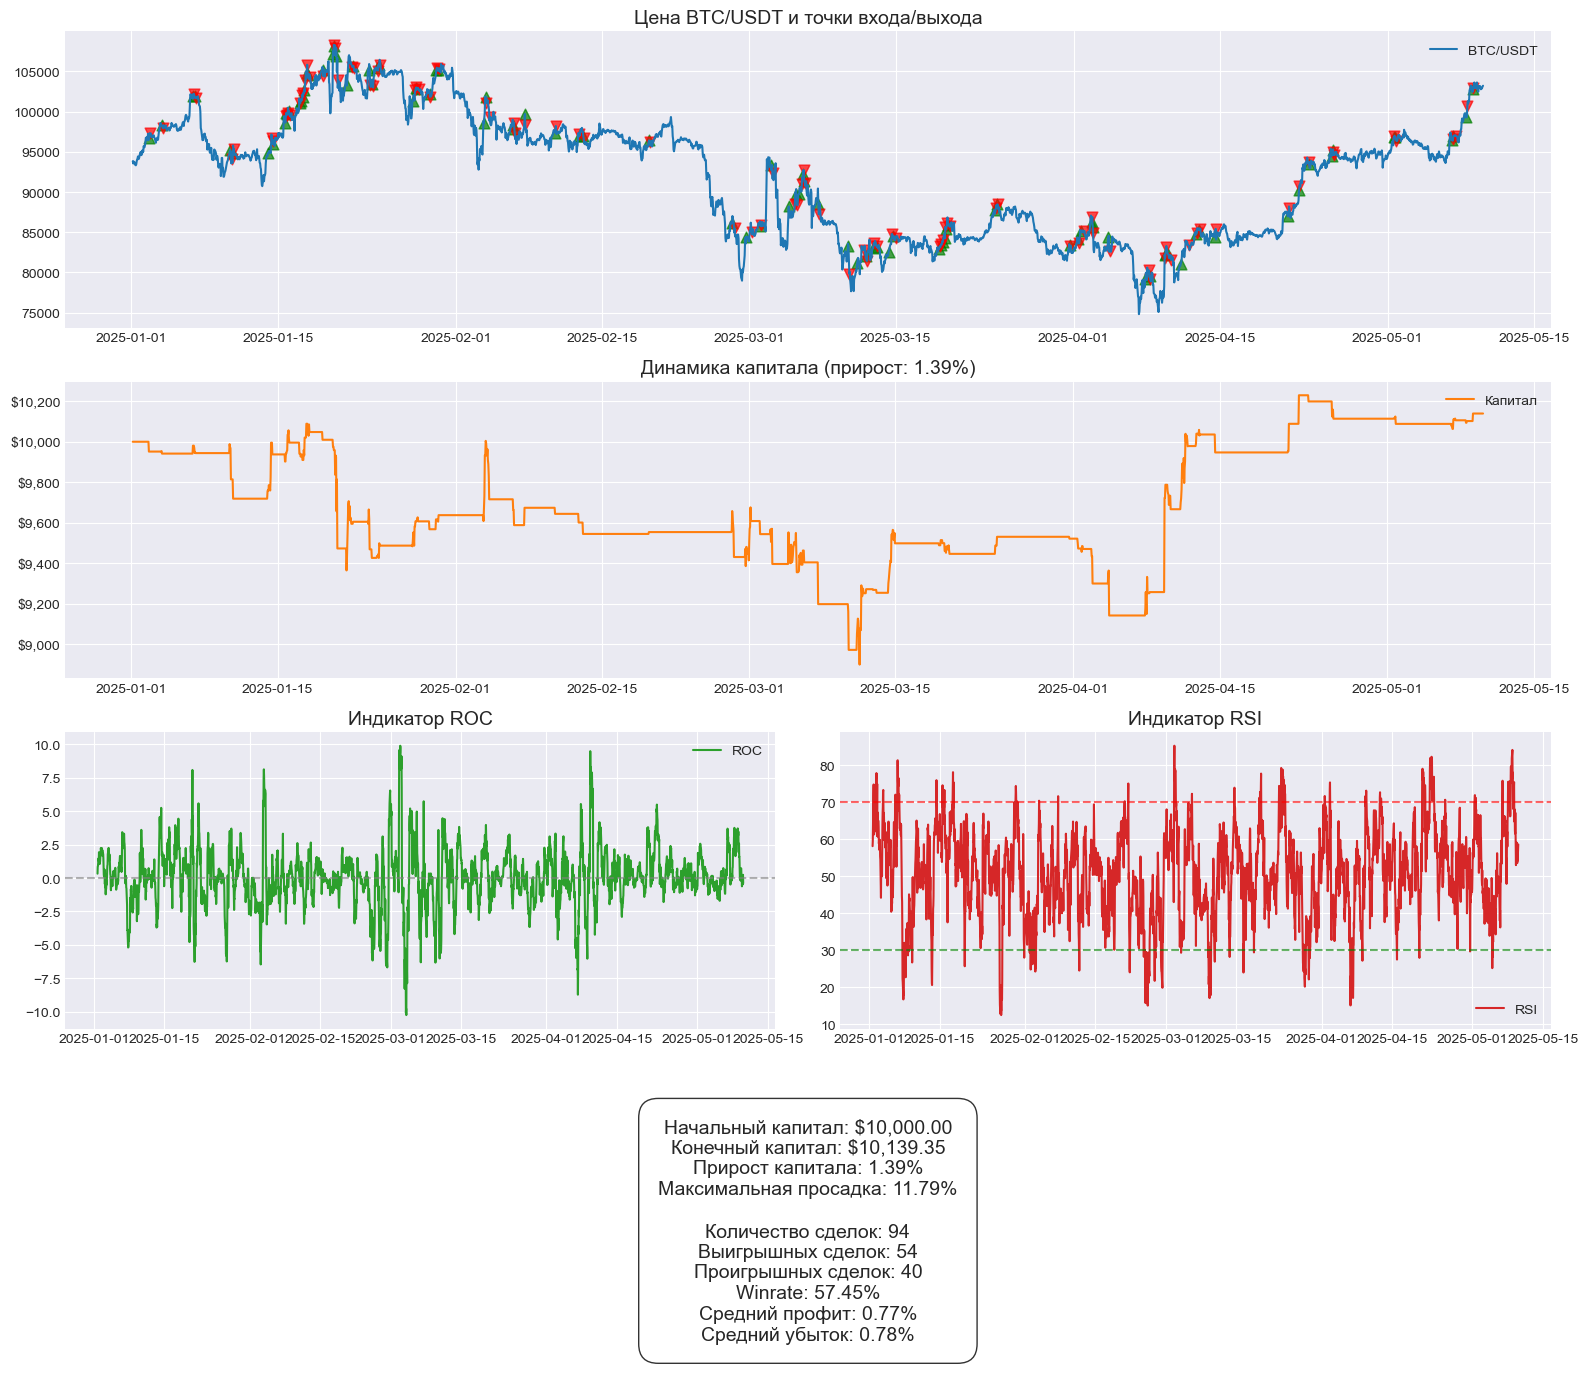

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from datetime import datetime
import time
import ta
from ta.momentum import RSIIndicator
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Функция для форматирования больших чисел с разделителями тысяч
def format_number(x, pos):
    return f"${x:,.0f}"

# Функция для получения данных от Binance API
def get_binance_data(symbol, interval, start_date, end_date):
    # Преобразуем даты в миллисекунды (timestamp)
    start_timestamp = int(datetime.strptime(start_date, "%d.%m.%Y").timestamp() * 1000)
    end_timestamp = int(datetime.strptime(end_date, "%d.%m.%Y").timestamp() * 1000)
    
    # Базовый URL для API Binance
    base_url = "https://api.binance.com/api/v3/klines"
    
    # Параметры запроса
    params = {
        "symbol": symbol,
        "interval": interval,
        "startTime": start_timestamp,
        "endTime": end_timestamp,
        "limit": 1000  # Максимальное количество свечей, которое можно получить за один запрос
    }
    
    all_klines = []
    
    # Пока не получим все данные за указанный период
    while True:
        # Делаем запрос к API
        response = requests.get(base_url, params=params)
        data = response.json()
        
        # Если нет данных, значит достигли конца периода
        if len(data) == 0:
            break
        
        # Добавляем полученные свечи к общему списку
        all_klines.extend(data)
        
        # Обновляем startTime для следующего запроса
        params["startTime"] = data[-1][0] + 1
        
        # Если получено меньше максимального количества свечей, значит это последние данные
        if len(data) < 1000:
            break
        
        # Небольшая задержка, чтобы не превысить лимиты API
        time.sleep(0.5)
    
    # Преобразуем данные в DataFrame
    df = pd.DataFrame(all_klines, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 
                                          'close_time', 'quote_asset_volume', 'number_of_trades',
                                          'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
    
    # Преобразуем типы данных
    numeric_columns = ['open', 'high', 'low', 'close', 'volume']
    df[numeric_columns] = df[numeric_columns].astype(float)
    
    # Преобразуем timestamp в datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    # Устанавливаем timestamp в качестве индекса
    df.set_index('timestamp', inplace=True)
    
    return df

# Функция для расчета ROC (Rate of Change)
def calculate_roc(data, window):
    return ((data / data.shift(window)) - 1) * 100

# Функция для бэктестинга стратегии
def backtest_momentum_strategy(df, roc_window, rsi_window, roc_threshold, rsi_upper, rsi_lower, initial_capital=10000):
    # Создаем копию датафрейма
    backtest_df = df.copy()
    
    # Рассчитываем ROC
    backtest_df['roc'] = calculate_roc(backtest_df['close'], roc_window)
    
    # Рассчитываем RSI
    rsi_indicator = RSIIndicator(close=backtest_df['close'], window=rsi_window)
    backtest_df['rsi'] = rsi_indicator.rsi()
    
    # Создаем сигналы
    backtest_df['signal'] = 0
    
    # Правила входа в позицию:
    # 1. ROC выше порогового значения (положительный импульс)
    # 2. RSI не в зоне перекупленности
    backtest_df.loc[(backtest_df['roc'] > roc_threshold) & (backtest_df['rsi'] < rsi_upper), 'signal'] = 1
    
    # Правила выхода из позиции:
    # 1. ROC ниже нуля (отрицательный импульс)
    # 2. RSI в зоне перепроданности
    backtest_df.loc[(backtest_df['roc'] < 0) | (backtest_df['rsi'] > rsi_upper), 'signal'] = 0
    
    # Определяем точки входа и выхода
    backtest_df['position'] = backtest_df['signal'].shift(1)
    backtest_df['position'].fillna(0, inplace=True)
    
    # Рассчитываем прибыль/убыток для каждого бара
    backtest_df['returns'] = backtest_df['close'].pct_change()
    backtest_df['strategy_returns'] = backtest_df['position'] * backtest_df['returns']
    
    # Рассчитываем накопленную доходность
    backtest_df['cum_returns'] = (1 + backtest_df['returns']).cumprod()
    backtest_df['cum_strategy_returns'] = (1 + backtest_df['strategy_returns']).cumprod()
    
    # Рассчитываем капитал
    backtest_df['capital'] = initial_capital * backtest_df['cum_strategy_returns']
    
    # Определяем сделки
    backtest_df['trade'] = backtest_df['position'].diff()
    
    # Список для хранения информации о сделках
    trades = []
    
    # Перебираем все строки с изменением позиции
    for i, row in backtest_df[backtest_df['trade'] != 0].iterrows():
        if row['trade'] > 0:  # Открытие позиции
            entry_price = row['close']
            entry_date = i
        elif row['trade'] < 0:  # Закрытие позиции
            exit_price = row['close']
            exit_date = i
            profit_pct = (exit_price / entry_price - 1) * 100
            trades.append({
                'entry_date': entry_date,
                'exit_date': exit_date,
                'entry_price': entry_price,
                'exit_price': exit_price,
                'profit_pct': profit_pct,
                'profit': profit_pct > 0
            })
    
    # Создаем DataFrame для сделок
    trades_df = pd.DataFrame(trades)
    
    # Рассчитываем дополнительные метрики
    if len(trades_df) > 0:
        total_trades = len(trades_df)
        winning_trades = len(trades_df[trades_df['profit']])
        losing_trades = total_trades - winning_trades
        win_rate = winning_trades / total_trades * 100
        
        avg_profit = trades_df[trades_df['profit']]['profit_pct'].mean() if winning_trades > 0 else 0
        avg_loss = abs(trades_df[~trades_df['profit']]['profit_pct'].mean()) if losing_trades > 0 else 0
        
        # Рассчитываем максимальную просадку (drawdown)
        peak = backtest_df['capital'].expanding().max()
        drawdown = ((backtest_df['capital'] - peak) / peak) * 100
        max_drawdown = abs(drawdown.min())
        
        # Рассчитываем прирост капитала
        capital_growth = (backtest_df['capital'].iloc[-1] / initial_capital - 1) * 100
        
        metrics = {
            'initial_capital': initial_capital,
            'final_capital': backtest_df['capital'].iloc[-1],
            'capital_growth_pct': capital_growth,
            'max_drawdown_pct': max_drawdown,
            'total_trades': total_trades,
            'winning_trades': winning_trades,
            'losing_trades': losing_trades,
            'win_rate': win_rate,
            'avg_profit_pct': avg_profit,
            'avg_loss_pct': avg_loss
        }
    else:
        metrics = {
            'initial_capital': initial_capital,
            'final_capital': backtest_df['capital'].iloc[-1],
            'capital_growth_pct': 0,
            'max_drawdown_pct': 0,
            'total_trades': 0,
            'winning_trades': 0,
            'losing_trades': 0,
            'win_rate': 0,
            'avg_profit_pct': 0,
            'avg_loss_pct': 0
        }
    
    return backtest_df, trades_df, metrics

# Визуализация результатов
def visualize_results(backtest_df, trades_df, metrics):
    # Устанавливаем стиль для графиков
    plt.style.use('seaborn-v0_8-darkgrid')
    sns.set_palette('viridis')
    
    # Создаем фигуру с подграфиками
    fig = plt.figure(figsize=(16, 14))
    
    # 1. График цены и позиций
    ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2)
    ax1.plot(backtest_df.index, backtest_df['close'], label='BTC/USDT', color='#1f77b4')
    
    # Отмечаем точки входа и выхода
    if len(trades_df) > 0:
        # Точки входа (зеленые)
        for entry_date in trades_df['entry_date']:
            entry_price = backtest_df.loc[entry_date, 'close']
            ax1.scatter(entry_date, entry_price, color='green', s=60, marker='^', alpha=0.7)
        
        # Точки выхода (красные)
        for exit_date in trades_df['exit_date']:
            exit_price = backtest_df.loc[exit_date, 'close']
            ax1.scatter(exit_date, exit_price, color='red', s=60, marker='v', alpha=0.7)
    
    ax1.set_title('Цена BTC/USDT и точки входа/выхода', fontsize=14)
    ax1.legend()
    ax1.grid(True)
    
    # 2. График капитала
    ax2 = plt.subplot2grid((4, 2), (1, 0), colspan=2)
    ax2.plot(backtest_df.index, backtest_df['capital'], label='Капитал', color='#ff7f0e')
    ax2.set_title(f'Динамика капитала (прирост: {metrics["capital_growth_pct"]:.2f}%)', fontsize=14)
    ax2.legend()
    ax2.grid(True)
    ax2.yaxis.set_major_formatter(FuncFormatter(format_number))
    
    # 3. График индикаторов
    ax3 = plt.subplot2grid((4, 2), (2, 0))
    ax3.plot(backtest_df.index, backtest_df['roc'], label='ROC', color='#2ca02c')
    ax3.axhline(y=0, color='gray', linestyle='--', alpha=0.6)
    ax3.set_title('Индикатор ROC', fontsize=14)
    ax3.legend()
    ax3.grid(True)
    
    ax4 = plt.subplot2grid((4, 2), (2, 1))
    ax4.plot(backtest_df.index, backtest_df['rsi'], label='RSI', color='#d62728')
    ax4.axhline(y=70, color='red', linestyle='--', alpha=0.6)
    ax4.axhline(y=30, color='green', linestyle='--', alpha=0.6)
    ax4.set_title('Индикатор RSI', fontsize=14)
    ax4.legend()
    ax4.grid(True)
    
    # 4. Метрики и результаты
    ax5 = plt.subplot2grid((4, 2), (3, 0), colspan=2)
    ax5.axis('off')  # Отключаем оси
    
    # Создаем текст с метриками
    metrics_text = (
        f"Начальный капитал: ${metrics['initial_capital']:,.2f}\n"
        f"Конечный капитал: ${metrics['final_capital']:,.2f}\n"
        f"Прирост капитала: {metrics['capital_growth_pct']:.2f}%\n"
        f"Максимальная просадка: {metrics['max_drawdown_pct']:.2f}%\n\n"
        f"Количество сделок: {metrics['total_trades']}\n"
        f"Выигрышных сделок: {metrics['winning_trades']}\n"
        f"Проигрышных сделок: {metrics['losing_trades']}\n"
        f"Winrate: {metrics['win_rate']:.2f}%\n"
        f"Средний профит: {metrics['avg_profit_pct']:.2f}%\n"
        f"Средний убыток: {metrics['avg_loss_pct']:.2f}%"
    )
    
    ax5.text(0.5, 0.5, metrics_text, ha='center', va='center', fontsize=14, bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=1'))
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Основной код для запуска бэктеста
def run_backtest():
    # Параметры
    symbol = "BTCUSDT"
    interval = "1h"
    start_date = "01.01.2025"
    end_date = "10.05.2025"
    initial_capital = 10000
    
    # Параметры стратегии
    roc_window = 14
    rsi_window = 14
    roc_threshold = 2  # Пороговое значение для ROC
    rsi_upper = 70  # Уровень перекупленности RSI
    rsi_lower = 30  # Уровень перепроданности RSI
    
    # Получаем данные
    print(f"Загрузка данных для {symbol} с {start_date} по {end_date}...")
    df = get_binance_data(symbol, interval, start_date, end_date)
    print(f"Загружено {len(df)} свечей")
    
    # Запускаем бэктест
    print("Запуск бэктестирования...")
    backtest_df, trades_df, metrics = backtest_momentum_strategy(
        df, roc_window, rsi_window, roc_threshold, rsi_upper, rsi_lower, initial_capital
    )
    
    # Выводим результаты
    print("\nРезультаты бэктестирования:")
    print(f"Начальный капитал: ${initial_capital:,.2f}")
    print(f"Конечный капитал: ${metrics['final_capital']:,.2f}")
    print(f"Прирост капитала: {metrics['capital_growth_pct']:.2f}%")
    print(f"Максимальная просадка: {metrics['max_drawdown_pct']:.2f}%")
    print(f"Количество сделок: {metrics['total_trades']}")
    print(f"Winrate: {metrics['win_rate']:.2f}%")
    print(f"Средний профит: {metrics['avg_profit_pct']:.2f}%")
    print(f"Средний убыток: {metrics['avg_loss_pct']:.2f}%")
    
    # Визуализируем результаты
    fig = visualize_results(backtest_df, trades_df, metrics)
    
    return backtest_df, trades_df, metrics, fig

if __name__ == "__main__":
    backtest_df, trades_df, metrics, fig = run_backtest()

## Стратегия основана на двух индикаторах:

* ROC (Rate of Change) - измеряет процентное изменение цены за определенный период
* RSI (Relative Strength Index) - определяет силу тренда и зоны перекупленности/перепроданности

## Правила входа в позицию:

* ROC > 2% (показывает положительный импульс)
* RSI < 70 (не в зоне перекупленности)

## Правила выхода из позиции:

* ROC < 0 (отрицательный импульс) ИЛИ
* RSI > 70 (вход в зону перекупленности)